In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anlise-de-impacto-do-programa-meninas-digitais/Projetos Meninas Digitais - maria (1).csv
/kaggle/input/anlise-de-impacto-do-programa-meninas-digitais/alunos_projeto-3.csv
/kaggle/input/anlise-de-impacto-do-programa-meninas-digitais/alunos_projeto.csv
/kaggle/input/anlise-de-impacto-do-programa-meninas-digitais/Projetos Meninas Digitais (01_08_2022).csv
/kaggle/input/anlise-de-impacto-do-programa-meninas-digitais/Projetos Meninas Digitais - maria.csv
/kaggle/input/anlise-de-impacto-do-programa-meninas-digitais/Copy of Projetos Meninas Digitais - Tabela de AGOSTO (01_08_2022).csv


## Funções e Carregamento da Base

In [34]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

replace_map = {
    'TP_SITUACAO': {2: "Cursando",
                    3: "Matrícula trancada",
                    4: "Desvinculado do curso",
                    5: "Transferido para outro \n curso da mesma IES",
                    6: "Formado",
                    7: "Falecido"},
    'TP_SEXO' : {1: "Feminino", 2: "Masculino"}
}

colors = [(0.62, 0.0, 0.26), (0.89, 0.32, 0.29), (0.99, 0.65, 0.36), (1, 0.90, 0.44), (0.59, 0.73, 0.38), (0.64, 0.85, 0.64), (0.28, 0.63, 0.70), (0.37, 0.31, 0.64)]
cm = LinearSegmentedColormap.from_list('Spectral', colors)

def bar_plot_lines(dataframe, param1, param2, param3, param4, colormap="", nome_fig='teste.jpg'):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)

  if colormap != "":
    # colormap = plt.cm.nipy_spectral
    # colors = [colormap(i) for i in np.linspace(0, 1, len(df[param2].unique()))]
    data.replace(replace_map).groupby(param2)[param1].value_counts().sort_values().unstack(0) \
        .plot.bar(rot=0, figsize=(25, 10), colormap=colormap, fontsize=16, width=0.9, linestyle="--") \
        .legend(prop={'size': 20})
  else:
    data.replace(replace_map).groupby(param2)[param1].value_counts().sort_values().unstack(0) \
        .plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
        .legend(prop={'size': 20})
        
  plt.ylabel(param3, fontsize = 20)
  plt.xlabel(param4, fontsize = 20)

  xposition = [0.5 + i for i in range(len(df[param1].unique()))]
  for xc in xposition:
      plt.axvline(x=xc, color='gray', linestyle=':')
  plt.savefig(nome_fig,bbox_inches="tight")
    
def bar_plot_lines_stacked_horizontal(dataframe, param1, param2, param3, param4, 
  color_array=cm, colormap="", tick_amout=100, figure_size=(20, 30), 
  sort_params=['Feminino', 'Masculino'], nome_fig='teste.png'):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)

  data.groupby(param2)[param1].value_counts().unstack(0).sort_values(by=sort_params).plot.barh(rot=0, figsize=figure_size, fontsize=16, width=0.9, linestyle="--", stacked=True, xticks=[(i*1000) for i in range((tick_amout//1000) + 1)]).legend(prop={'size': 12})
  plt.ylabel(param3, fontsize = 16)
  plt.xlabel(param4, fontsize = 16)
  plt.savefig(nome_fig,bbox_inches="tight")
  xposition = [10 + (i)*10 for i in range(tick_amout//10)]



def bar_plot_lines_horizontal(dataframe, param1, param2, param3, param4, color_array=cm, colormap="", tick_amout=100, figure_size=(20, 30), sort_params=['Feminino', 'Masculino']):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)

  data.groupby(param2)[param1].value_counts().unstack(0).sort_values(by=sort_params)\
    .plot.barh(rot=0, figsize=figure_size, fontsize=16, width=0.9, linestyle="--", xticks=[(i*1000) for i in range((tick_amout//1000) + 1)]) \
    .legend(prop={'size': 12})
  plt.ylabel(param3, fontsize = 16)
  plt.xlabel(param4, fontsize = 16)
  xposition = [10 + (i)*10 for i in range(tick_amout//10)]

In [3]:
df = pd.read_csv('/kaggle/input/anlise-de-impacto-do-programa-meninas-digitais/alunos_projeto-3.csv')
df.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,TEM_DEFICIENCIA,FINANCIAMENTO_REEMBOLSAVEL,FINANCIAMENTO_NAO_REEMBOLSAVEL,Nome do Projeto,Nome do Projeto:,Status,Ano,AnoFim,Código IES,Código Curso
0,2009,43,2,1,54520,NaN,NaN,1.0,1,1,...,0,0,0,Catarinas,Catarinas,Ativo,2016,NaN,43,54520
1,2009,43,2,1,54520,NaN,NaN,1.0,1,1,...,0,0,0,Catarinas,Catarinas,Ativo,2016,NaN,43,54520
2,2009,43,2,1,54520,NaN,NaN,1.0,1,1,...,0,0,0,Catarinas,Catarinas,Ativo,2016,NaN,43,54520
3,2009,43,2,1,54520,NaN,NaN,1.0,1,1,...,0,0,0,Catarinas,Catarinas,Ativo,2016,NaN,43,54520
4,2009,43,2,1,54520,NaN,NaN,1.0,1,1,...,0,0,0,Catarinas,Catarinas,Ativo,2016,NaN,43,54520


In [4]:
df.shape

(378725, 81)

In [5]:
df['NU_ANO_CENSO'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

## Limpeza do dataset

separando cada curso em linhas diferentes

In [6]:
df['Código Curso'] = df['Código Curso'].apply(lambda x: str(x).split(','))
df = df.explode('Código Curso')

In [7]:
df.shape

(378725, 81)

In [8]:
df['Código Curso'] = df['Código Curso'].str.rstrip()
df['Código Curso'] = df['Código Curso'].str.lstrip()
print('código de curso nulo:',df.loc[df['Código Curso'].isna()]['Código IES'].unique())
df = df.loc[(df['Código Curso'] != 'nan')]

código de curso nulo: []


In [9]:
df.shape

(378725, 81)

In [10]:
df['Código Curso'] = df['Código Curso'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378725 entries, 0 to 378724
Data columns (total 81 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NU_ANO_CENSO                    378725 non-null  int64  
 1   CO_IES                          378725 non-null  int64  
 2   TP_CATEGORIA_ADMINISTRATIVA     378725 non-null  int64  
 3   TP_ORGANIZACAO_ACADEMICA        378725 non-null  int64  
 4   CO_CURSO                        378725 non-null  int64  
 5   CO_CURSO_POLO                   0 non-null       float64
 6   TP_TURNO                        358584 non-null  float64
 7   TP_GRAU_ACADEMICO               378725 non-null  float64
 8   TP_MODALIDADE_ENSINO            378725 non-null  int64  
 9   TP_NIVEL_ACADEMICO              378725 non-null  int64  
 10  CO_CINE_ROTULO                  378725 non-null  object 
 11  ID_ALUNO                        378725 non-null  object 
 12  CO_ALUNO_CURSO  

In [11]:
len(df['Código Curso'].unique())

143

### Projeto mais antigo = 2011
retirando todos os dados anteriores a 2011

In [12]:
df['NU_ANO_CENSO'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [13]:
df_2009 = df.copy()
df = df.loc[df.NU_ANO_CENSO >= 2011]
df.NU_ANO_CENSO.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

removendo linhas que o código de curso não bate

In [14]:
df = df.loc[df['Código Curso'] == df['CO_CURSO']]
df.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,TEM_DEFICIENCIA,FINANCIAMENTO_REEMBOLSAVEL,FINANCIAMENTO_NAO_REEMBOLSAVEL,Nome do Projeto,Nome do Projeto:,Status,Ano,AnoFim,Código IES,Código Curso
762,2011,43,2,1,54520,NaN,4.0,1.0,1,1,...,0,0,0,Catarinas,Catarinas,Ativo,2016,NaN,43,54520
763,2011,43,2,1,54520,NaN,4.0,1.0,1,1,...,0,0,0,Catarinas,Catarinas,Ativo,2016,NaN,43,54520
764,2011,43,2,1,54520,NaN,4.0,1.0,1,1,...,0,0,0,Catarinas,Catarinas,Ativo,2016,NaN,43,54520
765,2011,43,2,1,54520,NaN,4.0,1.0,1,1,...,0,0,0,Catarinas,Catarinas,Ativo,2016,NaN,43,54520
766,2011,43,2,1,54520,NaN,4.0,1.0,1,1,...,1,0,0,Catarinas,Catarinas,Ativo,2016,NaN,43,54520


In [15]:
df.shape

(332503, 81)

Removendo projeto GRACE – GaRotAs na Computação e Empreendedorismo de São Paulo

In [18]:
df_projeto_removido = df.loc[(df['Nome do Projeto'] == 'GRACE – GaRotAs na Computação e Empreendedorismo') &
      (df['Cidade'] == 'São Paulo')]
print(df_projeto_removido.shape)
df_projeto_removido = df.loc[~((df['Nome do Projeto'] == 'GRACE – GaRotAs na Computação e Empreendedorismo') &
                              (df['Cidade'] == 'São Paulo'))]
print(df_projeto_removido.shape)
print(df.shape)
print(df.shape[0] - df_projeto_removido.shape[0])
df = df.loc[~((df['Nome do Projeto'] == 'GRACE – GaRotAs na Computação e Empreendedorismo') &
                              (df['Cidade'] == 'São Paulo'))]

KeyError: 'Cidade'

In [36]:
df.NU_ANO_CENSO.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [37]:
df.to_csv('data_aluno_projeto_limpo.csv', index=False)

## Análise exploratória

In [16]:
df_apenas_cursando = df.loc[df.TP_SITUACAO == 2]
df_apenas_cursando.TP_SITUACAO.unique()

array([2])

selecionando apenas os cursos de bacharel

In [17]:
df_bacharel = df.loc[df.TP_GRAU_ACADEMICO == 1].copy()

ajeitando anos

In [18]:
df_bacharel['AnoFim'].unique()

array([  nan, 2015., 2018., 2017.])

In [19]:
df_bacharel['AnoFim'].fillna(2019,inplace=True)

In [20]:
df_bacharel = df_bacharel.loc[(df_bacharel.NU_ANO_CENSO >= df_bacharel.Ano) 
                              & (df_bacharel.NU_ANO_CENSO <= df_bacharel.AnoFim)]

In [21]:
df_bacharel.Ano.unique()

array([2016, 2018, 2017, 2015, 2019, 2014, 2011, 2012, 2013])

In [22]:
df_bacharel.CO_IES.unique()

array([   43,    55,  5322,   586,   578,   579,     1,   584,   572,
         569,     5,     4,   577,    57,   719,     2,   585,   580,
        4504,     3,    12,    76,   575,   756,   692,   583,   588,
          54,  1808,   693,   570,   596,     8,  3279,   574,  3160,
         599,   694, 14724,  1807,  4925,  1811,  3189,   830,   600,
         601,   589,  3172,  4358,  1303, 15520])

In [23]:
df_bacharel.TP_MODALIDADE_ENSINO.unique()

array([1])

gerando gráfico **definitivo** apenas bacharel

In [24]:
df_bacharel.TP_SITUACAO.unique()

array([4, 6, 2, 3, 5, 7])

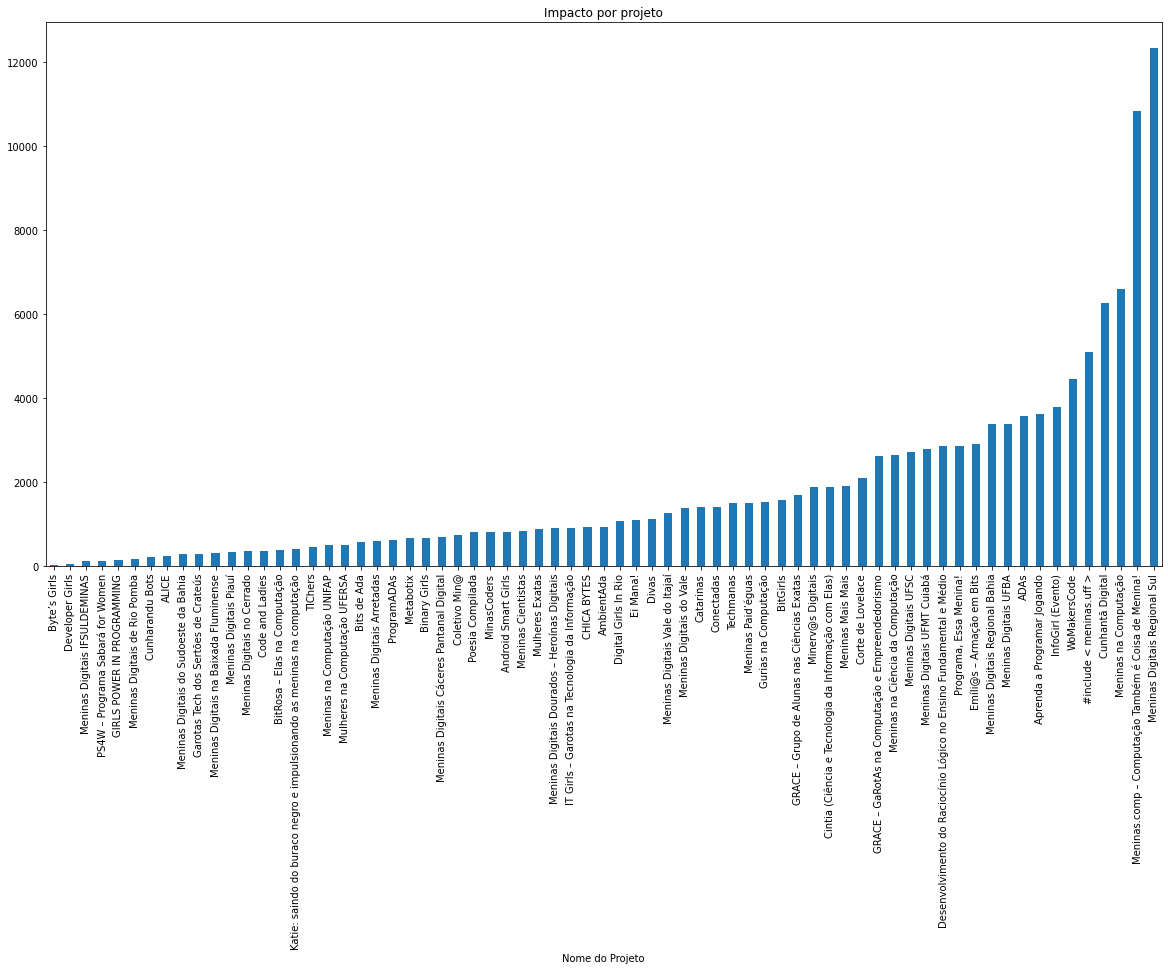

In [93]:
fig = df_bacharel.groupby(['Nome do Projeto']) \
    .size().sort_values() \
    .plot(kind='bar', figsize=(20, 10), title='Impacto por projeto').get_figure()
fig.savefig('impacto_projeto_total.jpg',bbox_inches="tight")

apenas alunos cursando

In [ ]:
df_apenas_cursando.groupby(['Nome do Projeto - Ativos']) \
    .size().sort_values().plot(kind='bar', figsize=(20, 10), title='Impacto por projeto')

In [ ]:
df_apenas_cursando.loc[df_apenas_cursando.Ano < 2019].groupby(['Nome do Projeto - Ativos']) \
    .size().sort_values().plot(kind='bar', figsize=(20, 10), title='Impacto por projeto')

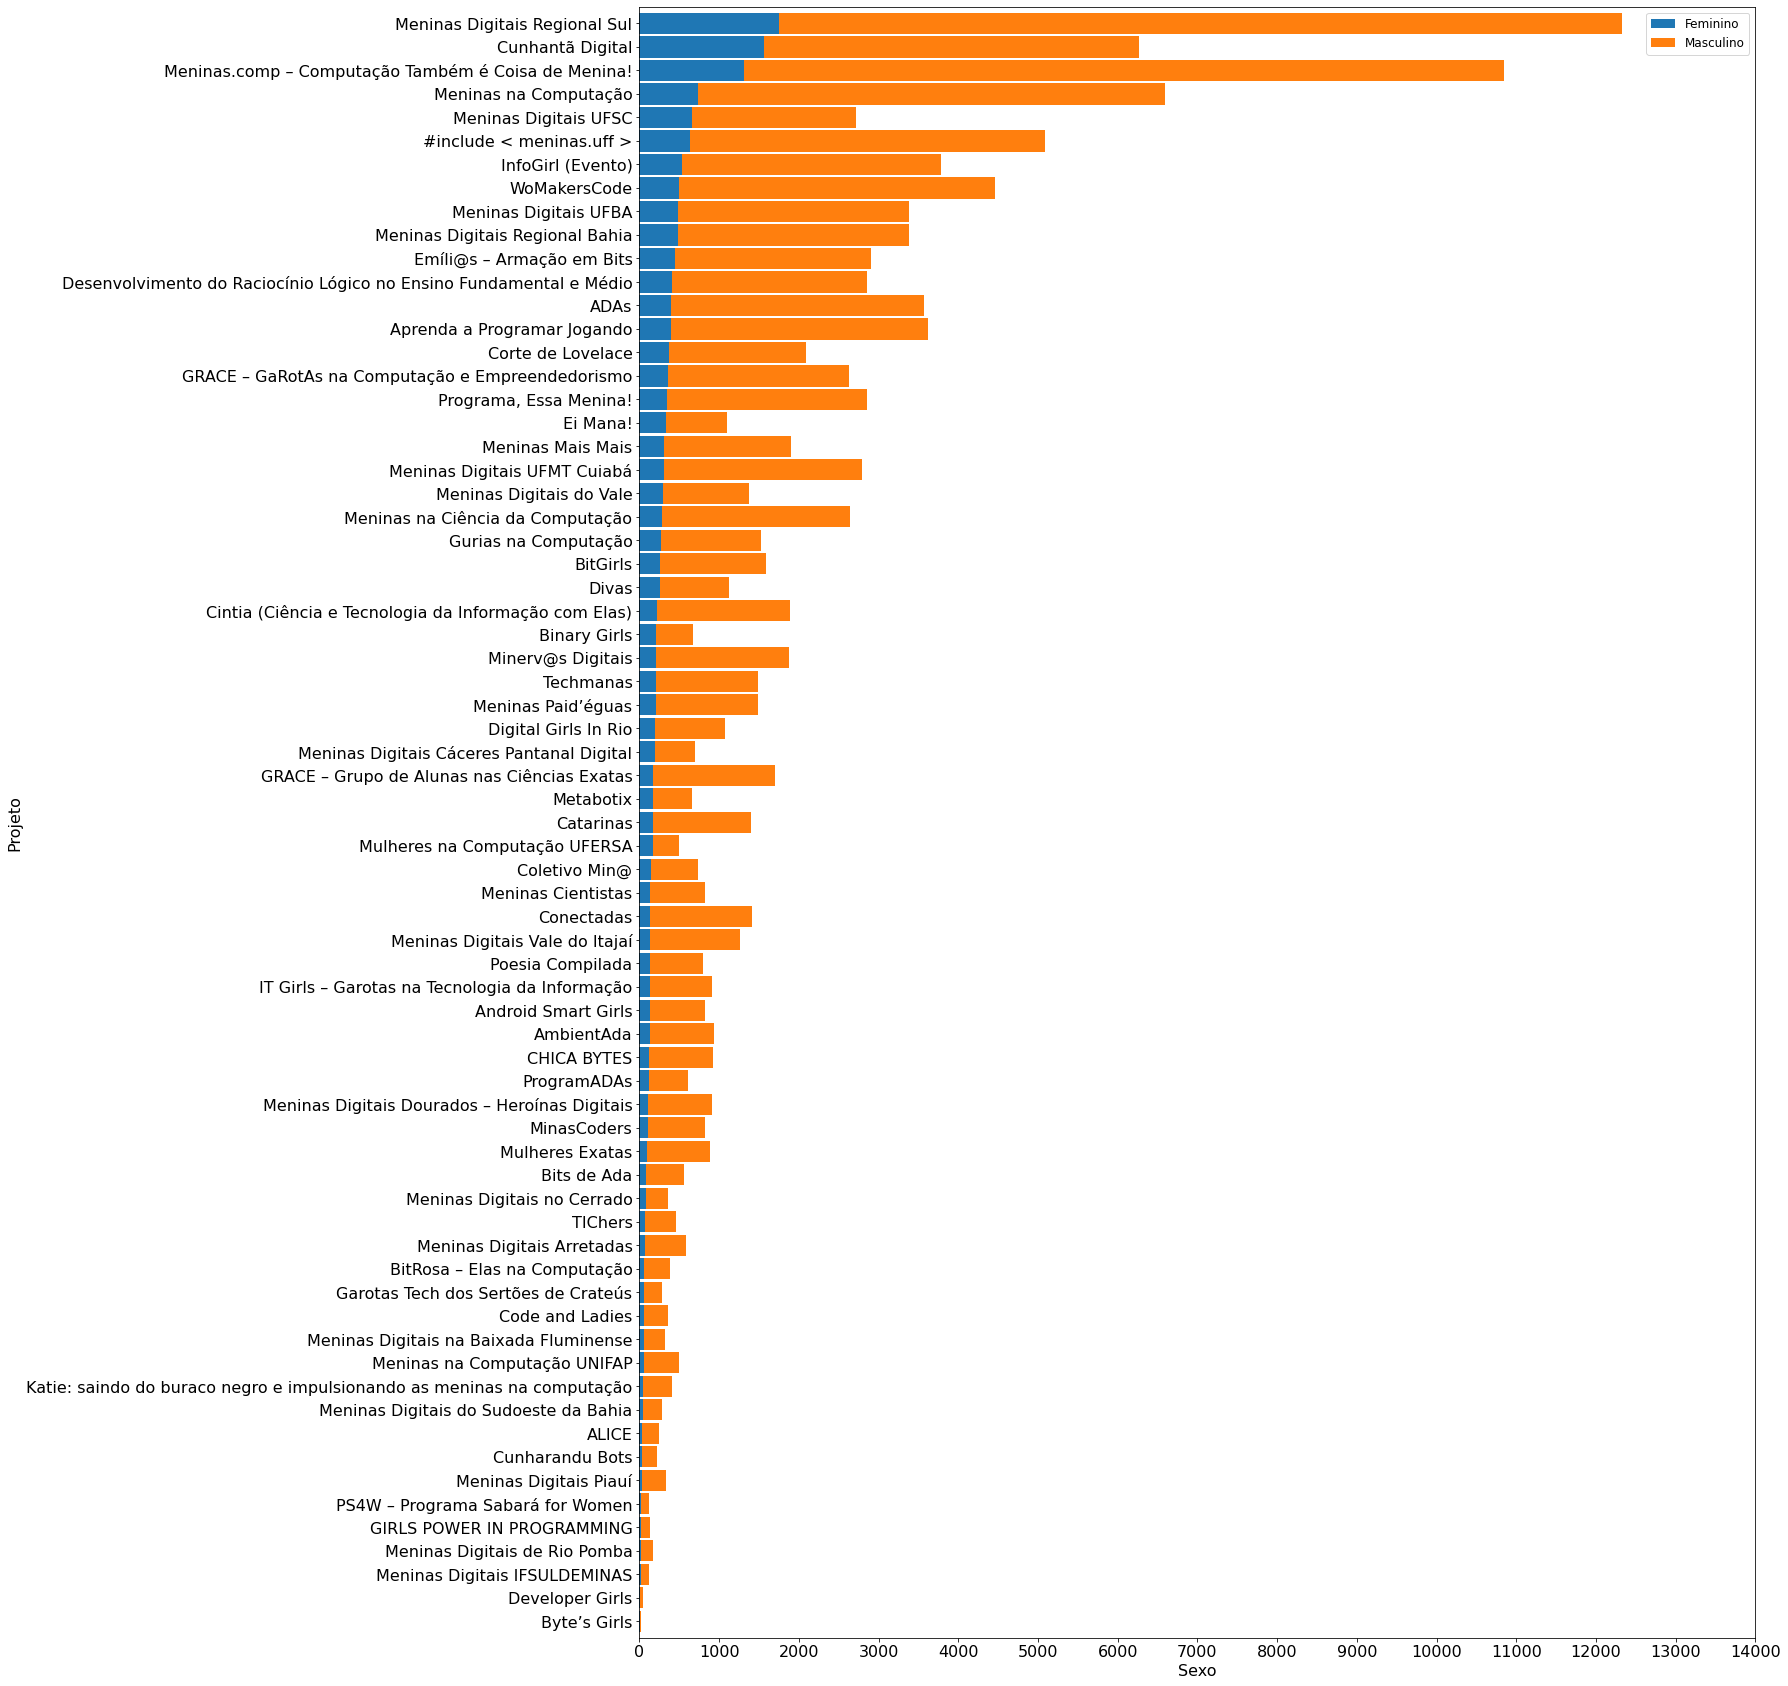

In [94]:
bar_plot_lines_stacked_horizontal(df_bacharel, 'Nome do Projeto', 'TP_SEXO', 
        'Projeto', 'Sexo', tick_amout=14500, nome_fig='impacto_projeto_genero.jpg')

Crescimento geral

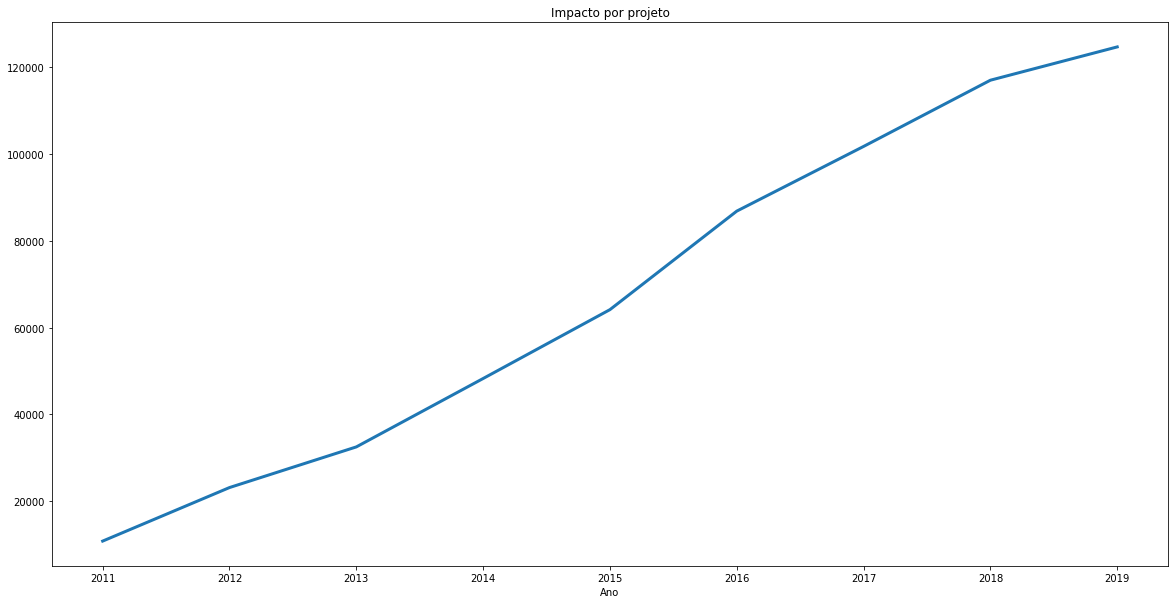

In [31]:
fig = df_bacharel.groupby(['Ano']).size().cumsum() \
    .plot(kind='line', lw=3, figsize=(20, 10), title='Impacto por projeto').get_figure()
fig.savefig('impacto_projeto_linha.jpg',bbox_inches="tight")

In [29]:
df_bacharel.groupby(['Ano']).size()

Ano
2011    10846
2012    12327
2013     9360
2014    15749
2015    15860
2016    22685
2017    14893
2018    15249
2019     7668
dtype: int64

In [30]:
df_bacharel.groupby(['Ano']).size().cumsum()

Ano
2011     10846
2012     23173
2013     32533
2014     48282
2015     64142
2016     86827
2017    101720
2018    116969
2019    124637
dtype: int64

In [27]:
df_bacharel.Ano.unique()

array([2016, 2018, 2017, 2015, 2019, 2014, 2011, 2012, 2013])

Crescimento apenas cursando

<AxesSubplot:title={'center':'Impacto por projeto'}, xlabel='Ano'>

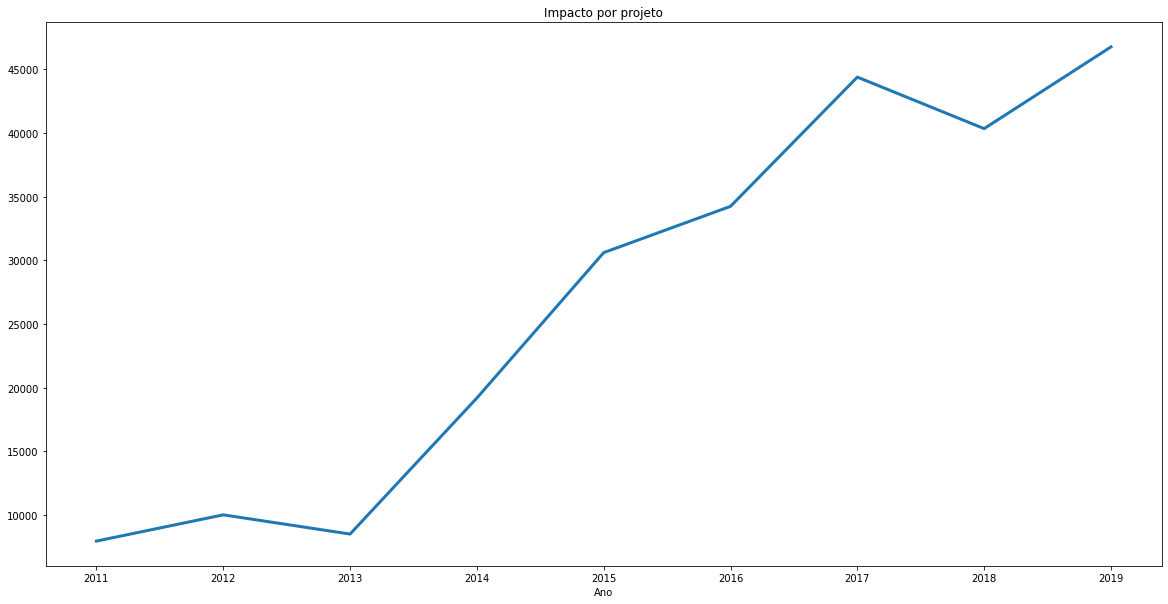

In [25]:
df_apenas_cursando.groupby(['Ano']).size().plot(kind='line', lw=3, figsize=(20, 10), title='Impacto por projeto')

apenas cursando

In [ ]:
bar_plot_lines_stacked_horizontal(df.loc[df.Ano < 2019], 'Nome do Projeto - Ativos', 'TP_SEXO', 'Projeto', 'Sexo', tick_amout=14500)

In [ ]:
bar_plot_lines_stacked_horizontal(df_apenas_cursando, 'Nome do Projeto - Ativos', 'TP_SEXO', 'Projeto', 'Sexo', tick_amout=14500)

In [ ]:
bar_plot_lines_stacked_horizontal(df_apenas_cursando.loc[df_apenas_cursando.Ano < 2019], 'Nome do Projeto - Ativos', 'TP_SEXO', 'Projeto', 'Sexo', tick_amout=14500)

#### Gráficos de idade

todas as situações

<AxesSubplot:title={'center':'Idade dos alunos impactados pelo projeto'}, xlabel='NU_IDADE'>

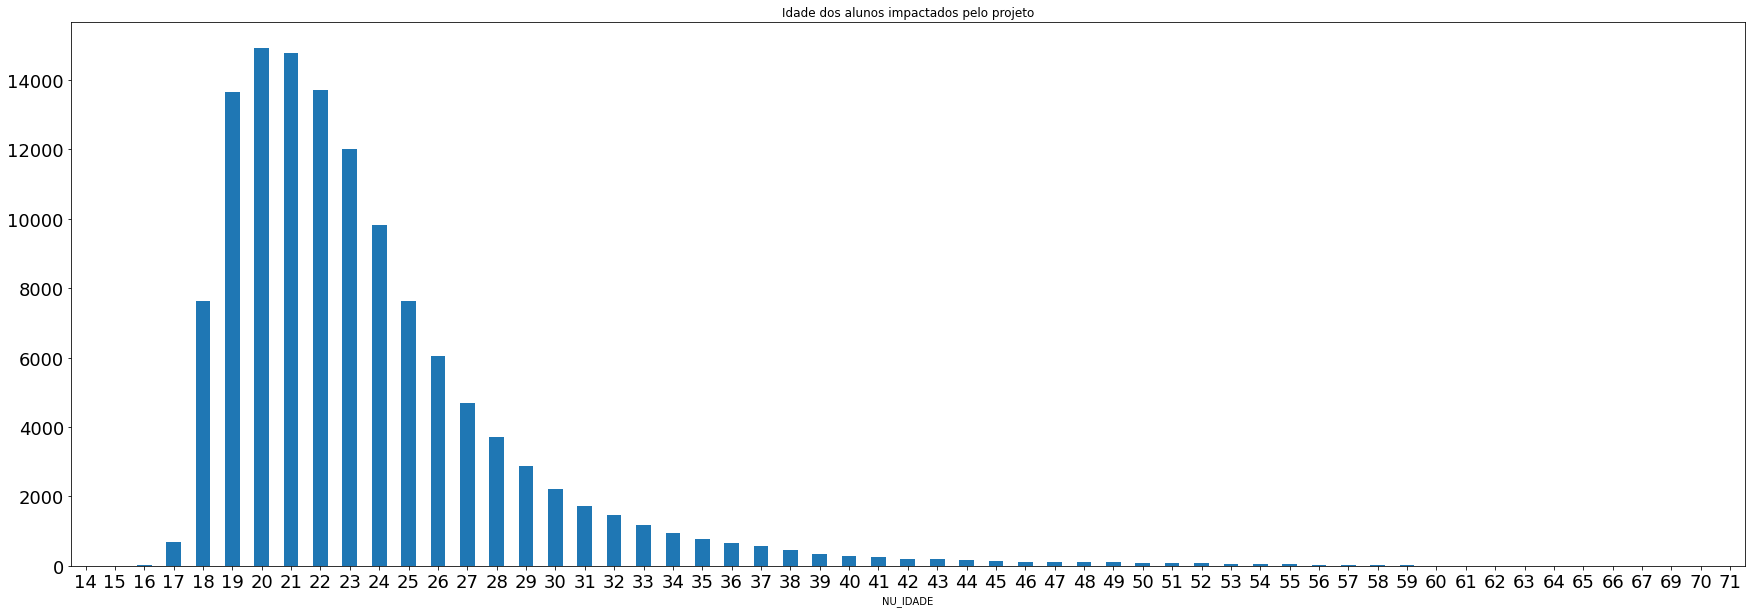

In [32]:
df_bacharel[['NU_IDADE']].groupby(['NU_IDADE']).size().plot(kind='bar', figsize=(30, 10), title='Idade dos alunos impactados pelo projeto', fontsize=18,rot=0)

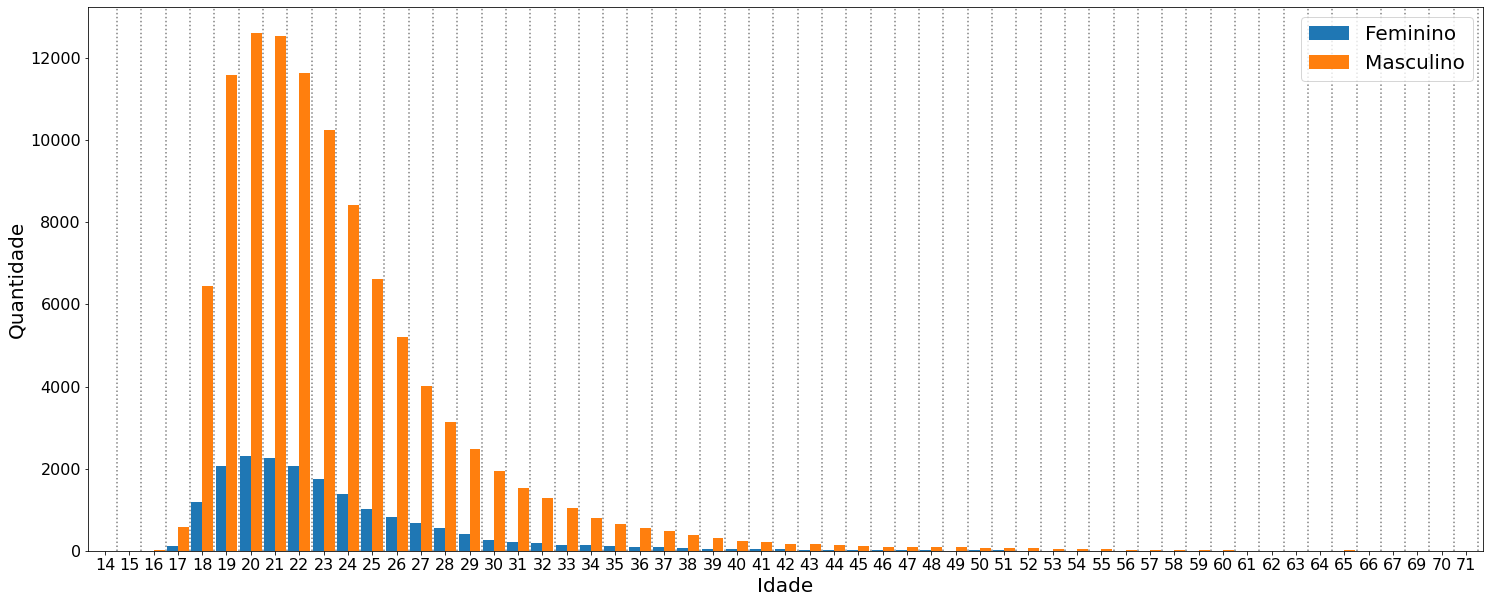

In [37]:
bar_plot_lines(df_bacharel, 'NU_IDADE', 'TP_SEXO', 'Quantidade', 'Idade', nome_fig='idade_genero_impacto.jpg')

In [45]:
df_bacharel.to_csv('base_meninas_digitais_2023.csv', index=False)

In [49]:
print("Média da idade masculina: ", df_bacharel.loc[df_bacharel['TP_SEXO'] == 2]['NU_IDADE'].mean())
print("Média da idade feminina: ", df_bacharel.loc[df_bacharel['TP_SEXO'] == 1]['NU_IDADE'].mean())

print("Mediana da idade masculina: ", df_bacharel.loc[df_bacharel['TP_SEXO'] == 2]['NU_IDADE'].median())
print("Mediana da idade feminina: ", df_bacharel.loc[df_bacharel['TP_SEXO'] == 1]['NU_IDADE'].median())

print("Maior idade masculina:", df_bacharel.loc[df_bacharel['TP_SEXO'] == 2]['NU_IDADE'].max())
print("Maior idade feminina:", df_bacharel.loc[df_bacharel['TP_SEXO'] == 1]['NU_IDADE'].max())

print("Menor idade masculina:", df_bacharel.loc[df_bacharel['TP_SEXO'] == 2]['NU_IDADE'].min())
print("Menor idade feminina:", df_bacharel.loc[df_bacharel['TP_SEXO'] == 1]['NU_IDADE'].min())

Média da idade masculina:  23.55249008290876
Média da idade feminina:  23.32013147082991
Mediana da idade masculina:  22.0
Mediana da idade feminina:  22.0
Maior idade masculina: 71
Maior idade feminina: 59
Menor idade masculina: 14
Menor idade feminina: 16


## Selecionando os 5 projetos

1. Meninas.comp
2. Cunhãta Digital
3. #includ<meninas.uff>
4. ADAS
5. Emíli@s

In [60]:
df_top5 = df_bacharel.loc[df_bacharel['Nome do Projeto'].str.contains("Meninas.comp") |
                         df_bacharel['Nome do Projeto'].str.contains("Cunhantã") |
                         df_bacharel['Nome do Projeto'].str.contains("#include")|
                         df_bacharel['Nome do Projeto'].str.match("ADAs") |
                         df_bacharel['Nome do Projeto'].str.contains("Emíli@s")]
df_top5["Nome do Projeto"].unique()

array(['ADAs', '#include < meninas.uff >', 'Cunhantã Digital',
       'Meninas.comp – Computação Também é Coisa de Menina!',
       'Emíli@s – Armação em Bits'], dtype=object)

In [61]:
df_top5.to_csv("meninas_digitais_top_5.csv", index=False)

## Tabelas - possíveis impactos por projeto

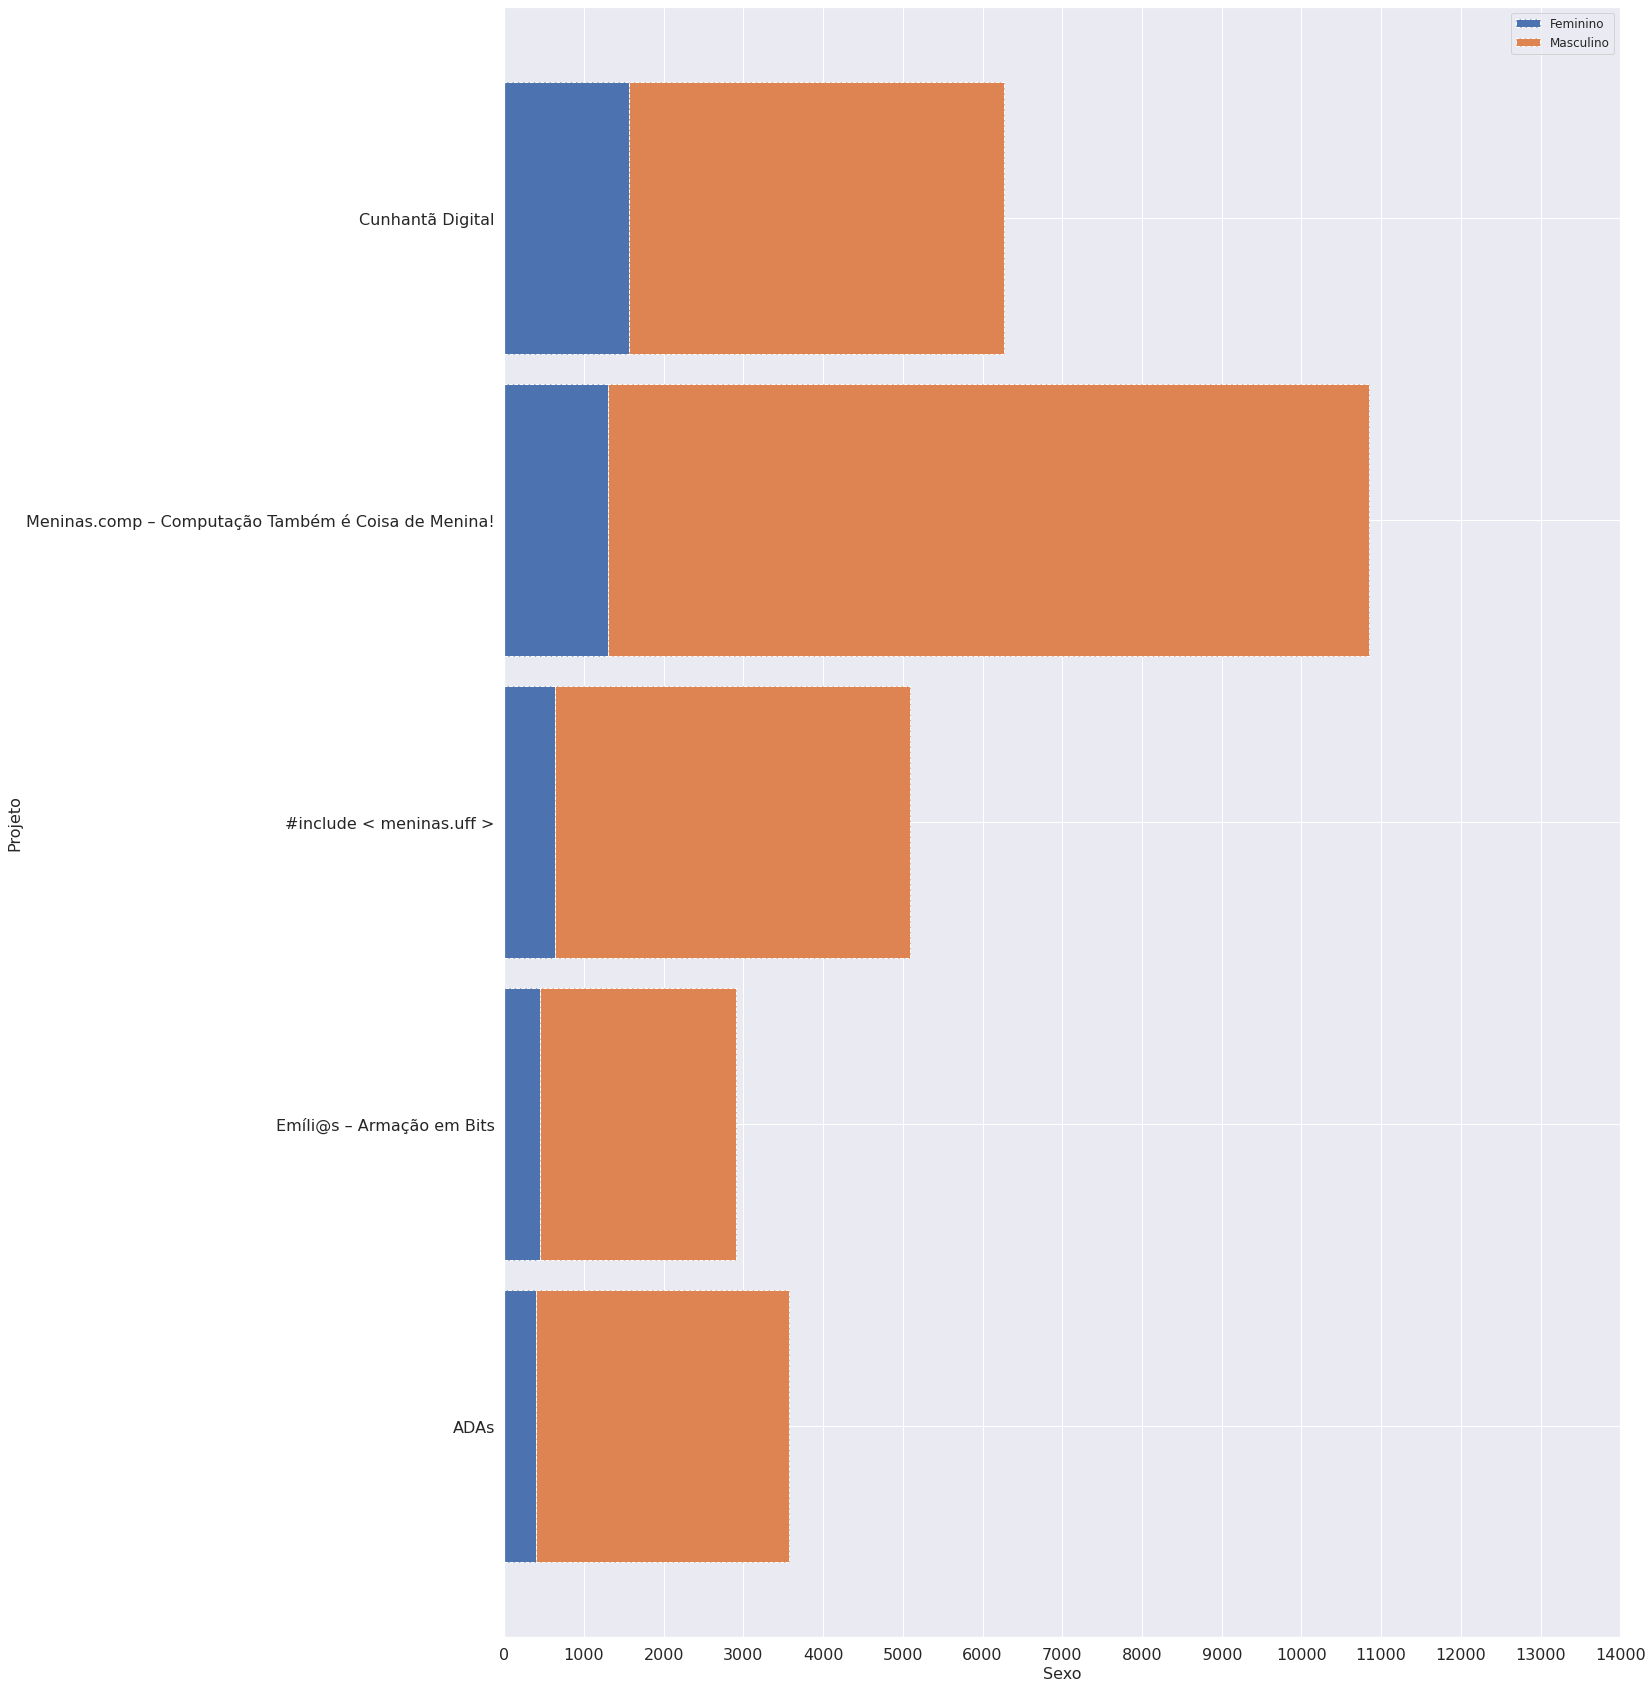

In [62]:
bar_plot_lines_stacked_horizontal(df_top5, 'Nome do Projeto', 'TP_SEXO', 
        'Projeto', 'Sexo', tick_amout=14500, nome_fig='impacto_projeto_genero_top5.jpg')

In [75]:
color_array=cm
colormap=""
tick_amout=100
figure_size=(20, 30)
sort_params=['Feminino', 'Masculino']
df = df_top5[['Nome do Projeto', 'TP_SEXO']]

data = (df.set_index(df.columns.drop('TP_SEXO',1).tolist())
['TP_SEXO']
.reset_index()
.rename(columns={0:'TP_SEXO'})
.loc[:, df.columns]
)
data = data.replace(replace_map)
data.groupby('TP_SEXO')['Nome do Projeto'].value_counts().unstack(0).sort_values(by=sort_params)

TP_SEXO,Feminino,Masculino
Nome do Projeto,,
ADAs,398,3171
Emíli@s – Armação em Bits,449,2458
#include < meninas.uff >,630,4460
Meninas.comp – Computação Também é Coisa de Menina!,1306,9540
Cunhantã Digital,1566,4705


#### Códigos e cursos

In [85]:
df_top5.loc[df_top5['Nome do Projeto'].str.match('ADAs')].groupby('Código IES')['Código Curso'].value_counts().unstack(0)

Código IES,584
Código Curso,
14098,1434
121570,696
123429,1439


In [80]:
df_top5.loc[df_top5['Nome do Projeto'].str.match('Emíli@s – Armação em Bits')].groupby('Código IES')['Código Curso'].value_counts().unstack(0)

Código IES,588
Código Curso,
115582,2907


In [81]:
df_top5.loc[df_top5['Nome do Projeto'].str.match('#include < meninas.uff >')].groupby('Código IES')['Código Curso'].value_counts().unstack(0)

Código IES,572
Código Curso,
12710,2683
1122221,2407


In [82]:
df_top5.loc[df_top5['Nome do Projeto'].str.match('Meninas.comp – Computação Também é Coisa de Menina!')].groupby('Código IES')['Código Curso'].value_counts().unstack(0)

Código IES,2
Código Curso,
127,3871
112891,3692
122204,3283


In [84]:
df_top5.loc[df_top5['Nome do Projeto'].str.match('Cunhantã Digital')].groupby('Código IES')['Código Curso'].value_counts()

Código IES  Código Curso
4           62484           1550
            112086          1521
            1158678         1343
            122634          1267
3172        1330347          590
Name: Código Curso, dtype: int64

#### números absolutos de estudantes por ano/gênero/cor e raça

In [96]:
df_top5.Ano.unique()

array([2017, 2016, 2015, 2011, 2013])

In [97]:
df_top5.groupby(['NU_ANO_CENSO'])['Nome do Projeto'].value_counts()

NU_ANO_CENSO  Nome do Projeto                                    
2011          Meninas.comp – Computação Também é Coisa de Menina!     746
2012          Meninas.comp – Computação Também é Coisa de Menina!     886
2013          Meninas.comp – Computação Também é Coisa de Menina!    1010
              Emíli@s – Armação em Bits                               357
2014          Meninas.comp – Computação Também é Coisa de Menina!    1133
              Emíli@s – Armação em Bits                               386
2015          Meninas.comp – Computação Também é Coisa de Menina!    1191
              Cunhantã Digital                                       1166
              Emíli@s – Armação em Bits                               426
2016          Cunhantã Digital                                       1301
              Meninas.comp – Computação Também é Coisa de Menina!    1279
              #include < meninas.uff >                               1235
              Emíli@s – Armação em Bits       

In [103]:
pd.set_option('display.max_rows', None)
df_top5.groupby(['NU_ANO_CENSO', 'TP_SEXO', 'TP_COR_RACA'])['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO  TP_SEXO  TP_COR_RACA  NU_ANO_CENSO
2011          1        2            2011              15
                       9            2011              79
              2        2            2011              92
                       3            2011               1
                       9            2011             559
2012          1        0            2012               1
                       1            2012               4
                       2            2012              18
                       3            2012               1
                       9            2012              87
              2        0            2012               7
                       1            2012              28
                       2            2012              91
                       3            2012               2
                       9            2012             647
2013          1        0            2013             112
                       1            201

**gráficos de idade, gênero e sexo**

* Mais de 55 anos 
* De 46 a 55 anos 
* De 36 a 45 anos 
* De 26 a 35 anos 
* De 18 a 25 anos 
* Menos de 18 anos

In [107]:
df_top5_55 = df_top5.loc[df_top5.NU_IDADE > 55]
df_top5_46 = df_top5.loc[(df_top5.NU_IDADE >= 46) & (df_top5.NU_IDADE <= 55)]
df_top5_36 = df_top5.loc[(df_top5.NU_IDADE >= 36) & (df_top5.NU_IDADE <= 45)]
df_top5_26 = df_top5.loc[(df_top5.NU_IDADE >= 26) & (df_top5.NU_IDADE <= 35)]
df_top5_18 = df_top5.loc[(df_top5.NU_IDADE >= 18) & (df_top5.NU_IDADE <= 25)]
df_top5_17 = df_top5.loc[df_top5.NU_IDADE <= 17]

In [108]:
df_top5_55.groupby(['NU_ANO_CENSO', 'TP_SEXO'])['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO  TP_SEXO  NU_ANO_CENSO
2015          2        2015            1
2016          2        2016            3
2017          2        2017            6
2018          2        2018            7
2019          2        2019            7
Name: NU_ANO_CENSO, dtype: int64

In [109]:
df_top5_46.groupby(['NU_ANO_CENSO', 'TP_SEXO'])['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO  TP_SEXO  NU_ANO_CENSO
2011          2        2011             2
2012          2        2012             2
2013          2        2013             5
2014          2        2014             5
2015          1        2015             2
              2        2015            13
2016          1        2016             4
              2        2016            25
2017          1        2017             6
              2        2017            25
2018          1        2018             7
              2        2018            16
2019          1        2019             6
              2        2019            19
Name: NU_ANO_CENSO, dtype: int64

In [110]:
df_top5_36.groupby(['NU_ANO_CENSO', 'TP_SEXO'])['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO  TP_SEXO  NU_ANO_CENSO
2011          2        2011             6
2012          2        2012             7
2013          1        2013             1
              2        2013            14
2014          1        2014             1
              2        2014            12
2015          1        2015             8
              2        2015            49
2016          1        2016            11
              2        2016            66
2017          1        2017            14
              2        2017            85
2018          1        2018            11
              2        2018            89
2019          1        2019            14
              2        2019            86
Name: NU_ANO_CENSO, dtype: int64

In [114]:
df_top5_26.groupby(['NU_ANO_CENSO', 'TP_SEXO'])['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO  TP_SEXO  NU_ANO_CENSO
2011          1        2011              5
              2        2011             41
2012          1        2012              5
              2        2012             47
2013          1        2013             18
              2        2013            113
2014          1        2014             17
              2        2014            146
2015          1        2015             77
              2        2015            326
2016          1        2016            114
              2        2016            618
2017          1        2017            127
              2        2017            816
2018          1        2018            140
              2        2018            859
2019          1        2019            143
              2        2019            925
Name: NU_ANO_CENSO, dtype: int64

In [115]:
df_top5_18.groupby(['NU_ANO_CENSO', 'TP_SEXO'])['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO  TP_SEXO  NU_ANO_CENSO
2011          1        2011              86
              2        2011             587
2012          1        2012             103
              2        2012             696
2013          1        2013             170
              2        2013            1019
2014          1        2014             181
              2        2014            1124
2015          1        2015             434
              2        2015            1849
2016          1        2016             569
              2        2016            2808
2017          1        2017             666
              2        2017            3732
2018          1        2018             667
              2        2018            3885
2019          1        2019             711
              2        2019            3997
Name: NU_ANO_CENSO, dtype: int64

In [116]:
df_top5_17.groupby(['NU_ANO_CENSO', 'TP_SEXO'])['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO  TP_SEXO  NU_ANO_CENSO
2011          1        2011             3
              2        2011            16
2012          1        2012             3
              2        2012            23
2013          1        2013             2
              2        2013            25
2014          1        2014             2
              2        2014            31
2015          1        2015             3
              2        2015            21
2016          1        2016             8
              2        2016            19
2017          1        2017             4
              2        2017            26
2018          1        2018             2
              2        2018            19
2019          1        2019             4
              2        2019            16
Name: NU_ANO_CENSO, dtype: int64

## Estudantes afetados ano e gênero top 5

In [125]:
df_top5.loc[df_top5['NU_ANO_CENSO'] == 2011]['Nome do Projeto'].unique()

array(['Meninas.comp – Computação Também é Coisa de Menina!'],
      dtype=object)

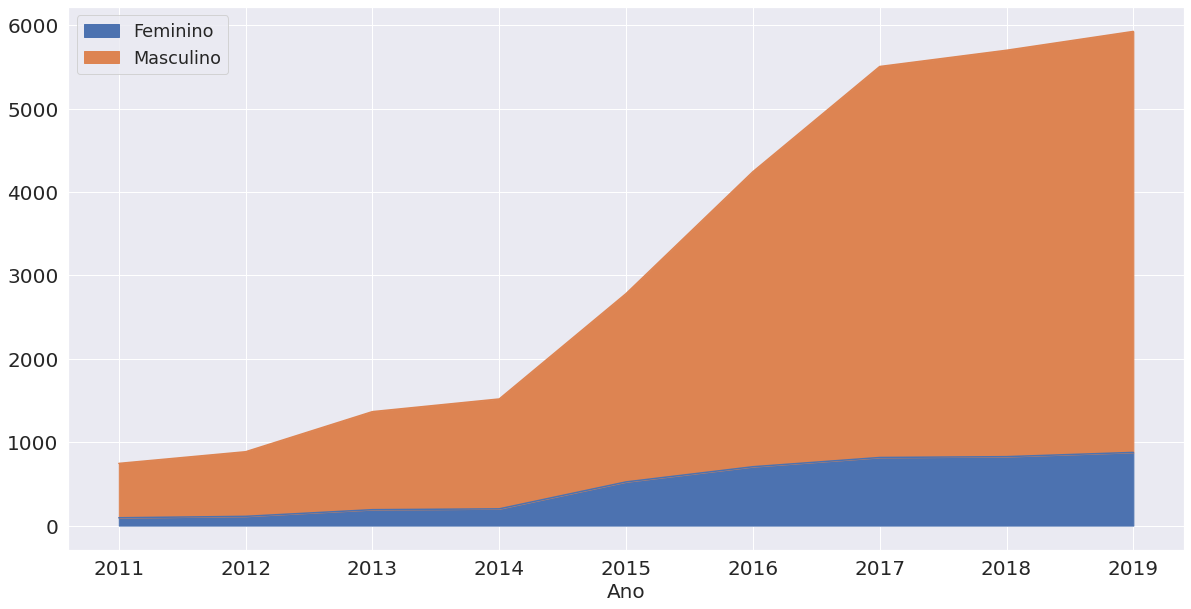

In [127]:
# Gráfico da quantidade de homens e mulheres nos 5 maiores projetos
df_top5.replace(replace_map).groupby(['NU_ANO_CENSO', 'TP_SEXO']).size().unstack(1).plot(kind='area', figsize=(20, 10), fontsize=20)
plt.ylabel('', fontsize = 20)
plt.xlabel('Ano', fontsize = 20)
plt.legend(title='')
plt.savefig('estudantes_afetados_top5_ano_genero.jpg')

In [128]:
df_teste = pd.DataFrame(df_top5.replace(replace_map).groupby(['NU_ANO_CENSO', 'TP_SEXO', 'IN_ATIVIDADE_EXTRACURRICULAR']).size().reset_index(name='count')).copy()

homens_com_atividade = df_teste.loc[(df_teste['IN_ATIVIDADE_EXTRACURRICULAR'] == 1) & (df_teste['TP_SEXO'] == 'Masculino')]['count'].values
homens_sem_atividade = df_teste.loc[(df_teste['IN_ATIVIDADE_EXTRACURRICULAR'] == 0) & (df_teste['TP_SEXO'] == 'Masculino')]['count'].values

mulheres_com_atividade = df_teste.loc[(df_teste['IN_ATIVIDADE_EXTRACURRICULAR'] == 1) & (df_teste['TP_SEXO'] == 'Feminino')]['count'].values
mulheres_sem_atividade = df_teste.loc[(df_teste['IN_ATIVIDADE_EXTRACURRICULAR'] == 0) & (df_teste['TP_SEXO'] == 'Feminino')]['count'].values

anos = df_teste['NU_ANO_CENSO'].unique()

In [129]:
print( homens_com_atividade.sum(), homens_sem_atividade.sum())
print('Porcentagem de homens que fazem alguma atividade geral: ', (homens_com_atividade.sum() / (homens_com_atividade.sum() + homens_sem_atividade.sum()) * 100))
print(mulheres_com_atividade.sum(), mulheres_sem_atividade.sum())
print('Porcentagem de mulheres que fazem alguma atividade geral: ', (mulheres_com_atividade.sum() / (mulheres_com_atividade.sum() + mulheres_sem_atividade.sum()) * 100))

3306 21028
Porcentagem de homens que fazem alguma atividade geral:  13.585929152625956
692 3657
Porcentagem de mulheres que fazem alguma atividade geral:  15.91170383996321


In [130]:
for i in range(len(homens_com_atividade)):
  homens_total = homens_com_atividade[i] + homens_sem_atividade[i]
  print('números absolutos homens:', homens_com_atividade[i], homens_sem_atividade[i])
  print(f'Porcentagem de homens que fazem alguma atividade no ano {i}: ', ((homens_com_atividade[i] / homens_total) * 100))

print("======= MULHERES =======")
for i in range(len(mulheres_com_atividade)):
  mulheres_total = mulheres_com_atividade[i] + mulheres_sem_atividade[i]
  print('números absolutos mulheres:',mulheres_com_atividade[i], mulheres_sem_atividade[i])
  print(f'Porcentagem de mulheres que fazem alguma atividade no ano {i}: ', ((mulheres_com_atividade[i] / mulheres_total) * 100))

números absolutos homens: 80 572
Porcentagem de homens que fazem alguma atividade no ano 0:  12.269938650306749
números absolutos homens: 153 622
Porcentagem de homens que fazem alguma atividade no ano 1:  19.741935483870968
números absolutos homens: 205 971
Porcentagem de homens que fazem alguma atividade no ano 2:  17.431972789115648
números absolutos homens: 183 1135
Porcentagem de homens que fazem alguma atividade no ano 3:  13.884673748103188
números absolutos homens: 320 1939
Porcentagem de homens que fazem alguma atividade no ano 4:  14.165559982293049
números absolutos homens: 410 3129
Porcentagem de homens que fazem alguma atividade no ano 5:  11.58519355750212
números absolutos homens: 599 4091
Porcentagem de homens que fazem alguma atividade no ano 6:  12.771855010660982
números absolutos homens: 767 4108
Porcentagem de homens que fazem alguma atividade no ano 7:  15.733333333333333
números absolutos homens: 589 4461
Porcentagem de homens que fazem alguma atividade no ano 8:

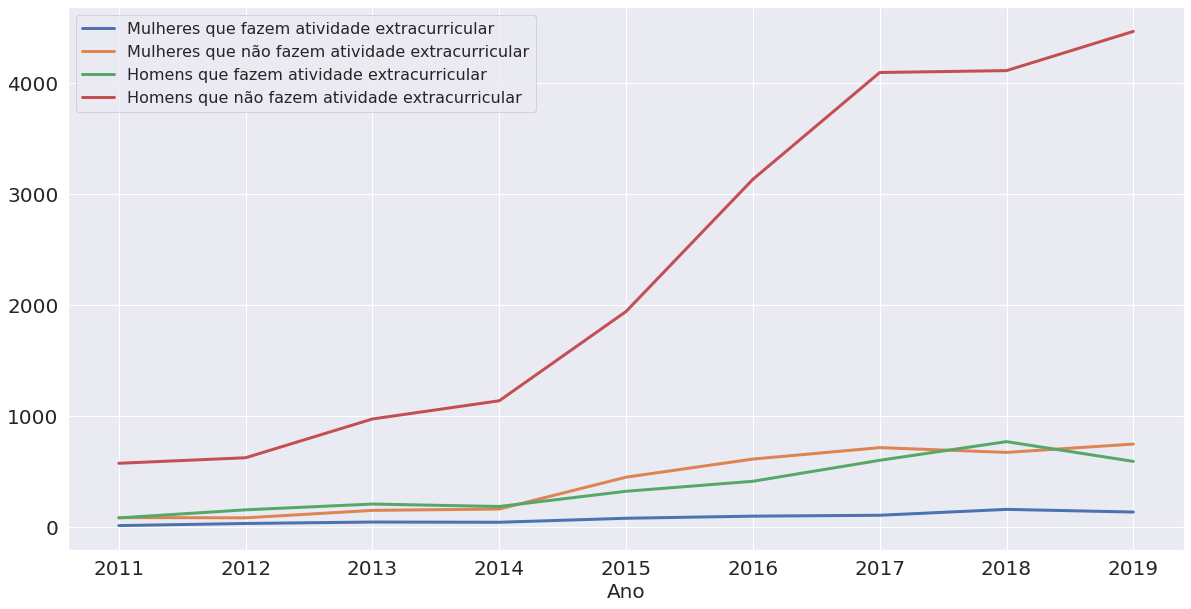

In [133]:
df_atividades = pd.DataFrame({'NU_ANO_CENSO': anos, 
                   'homens_0': homens_sem_atividade, 
                   'homens_1':homens_com_atividade, 
                   'mulheres_0': mulheres_sem_atividade,
                   'mulheres_1':mulheres_com_atividade
                  })
df_atividades.sort_index(axis=1, ascending=False).plot.line( lw=3, x='NU_ANO_CENSO', figsize=(20, 10), fontsize=20)

plt.ylabel('', fontsize = 20)
plt.xlabel('Ano', fontsize = 20)

plt.legend(['Mulheres que fazem atividade extracurricular', 'Mulheres que não fazem atividade extracurricular', 'Homens que fazem atividade extracurricular', 'Homens que não fazem atividade extracurricular'], loc='upper left', title='', prop={'size': 16})
plt.savefig('estudantes_extracurricular_por_genero.jpg')

## Gráficos de situação

tirando os cursando e falecidos pois falecidos tem apenas 17 e não aparece em comparação com as outras situações

* 2. Cursando
* 3. Matrícula trancada
* 4. Desvinculado do curso
* 5. Transferido para outro curso da mesma IES
* 6. Formado                                                   
* 7. Falecido                            

In [38]:
df_sem_cursando_falecido = df.loc[~df.TP_SITUACAO.isin([2, 7])]

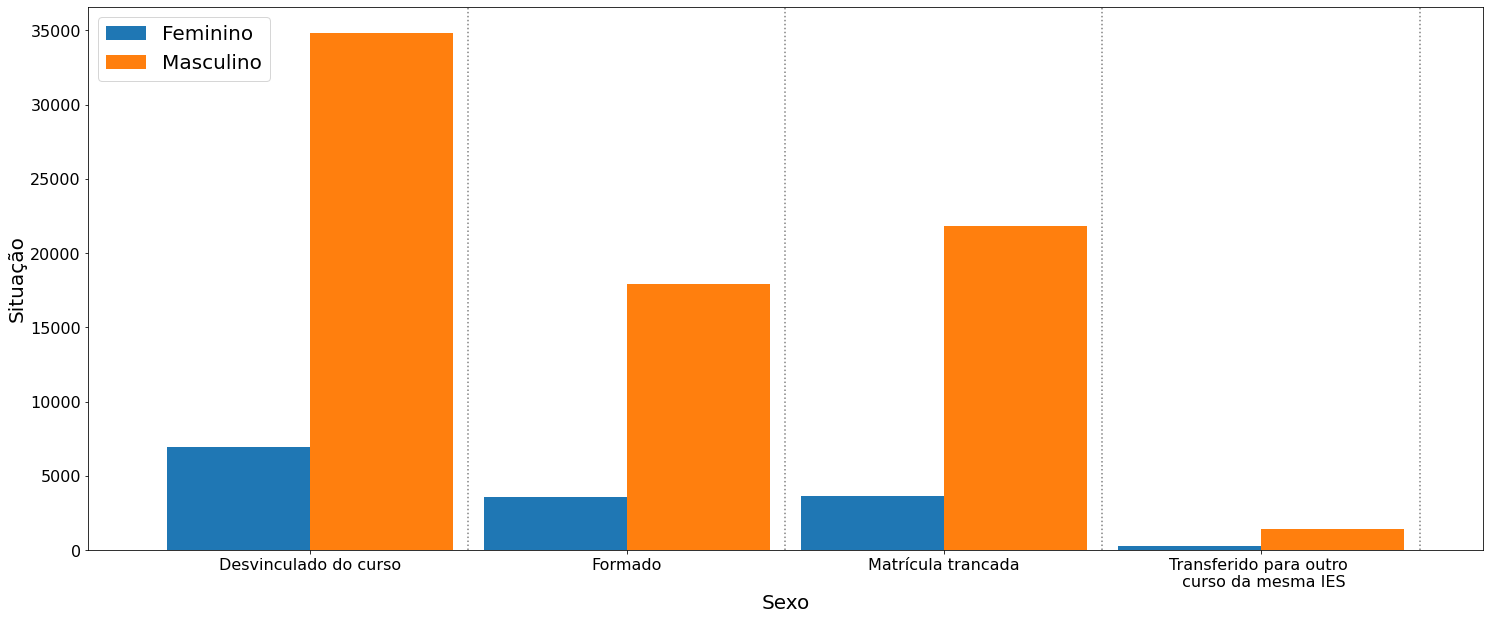

In [39]:
bar_plot_lines(df_sem_cursando_falecido, 'TP_SITUACAO', 'TP_SEXO', 'Situação', 'Sexo')

### Teste com heatmap

In [41]:
teste = df_sem_cursando_falecido.replace(replace_map).groupby('TP_SEXO')['TP_SITUACAO'].value_counts().unstack(0)

vetor = []
for i in teste.values.tolist():
    vetor.append(i[0])
for i in teste.values.tolist():
    vetor.append(i[1])
print(vetor)
print(teste.index.tolist())

[6960, 3590, 3658, 285, 34839, 17896, 21853, 1421]
['Desvinculado do curso', 'Formado', 'Matrícula trancada', 'Transferido para outro \n curso da mesma IES']


In [42]:
import seaborn as sn
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def remover_nan(vetor):
  retorno = []
  for i in vetor:
    if np.isneginf(i) or np.isposinf(i) or np.isnan(i):
       retorno.append(-1)
    else:
      retorno.append(i)
  return retorno

def gera_heatmap_df(ano):
    teste = df_sem_cursando_falecido.loc[df_sem_cursando_falecido.NU_ANO_CENSO == ano] \
    .replace(replace_map).groupby('TP_SEXO')['TP_SITUACAO'].value_counts().unstack(0)
    vetor = []
    for i in teste.values.tolist():
        vetor.append(i[0])
    for i in teste.values.tolist():
        vetor.append(i[1])
    vetor = remover_nan(vetor)
    tam = len(teste.index)
    vetor_generos = ['Mulheres','Homens']

    x = np.array(np.tile(teste.index.tolist(), 2))
    y = np.array(np.repeat(vetor_generos, tam))
    z = np.array(vetor)

    df_mp = pd.DataFrame.from_dict(np.array([x,y,z]).T)
    df_mp.columns = ['Situação','Gênero','Qt. Estudantes']
    df_mp['Qt. Estudantes'] = pd.to_numeric(df_mp['Qt. Estudantes'])
    heatmap = df_mp.pivot('Situação','Gênero','Qt. Estudantes')
    return heatmap


def create_color(r, g, b):
  return [r/256, g/256, b/256]
 
def get_custom_color_palette():
  return LinearSegmentedColormap.from_list("", list(reversed([
      create_color(227, 101, 33), create_color(246, 145, 53), create_color(251, 168, 74),
      create_color(218, 212, 200),
      create_color(141, 193, 223), create_color(114, 167, 208), create_color(43, 92, 138)
  ])))

# impedir que o heatmap apresente os dados ordenados por ordem alfabética
# pivotted2014_2015.index = pd.CategoricalIndex(pivotted2014_2015.index, categories=vetor_idades)
# pivotted2014_2015.sort_index(level=0, inplace=True)

# plt.figure(figsize=(16,9))
# plt.title("Taxa de Evasão Por Gênero e Idade")

# sn.heatmap(pivotted2014_2015, annot=True, linewidths=4, fmt='d', cmap ='Blues')

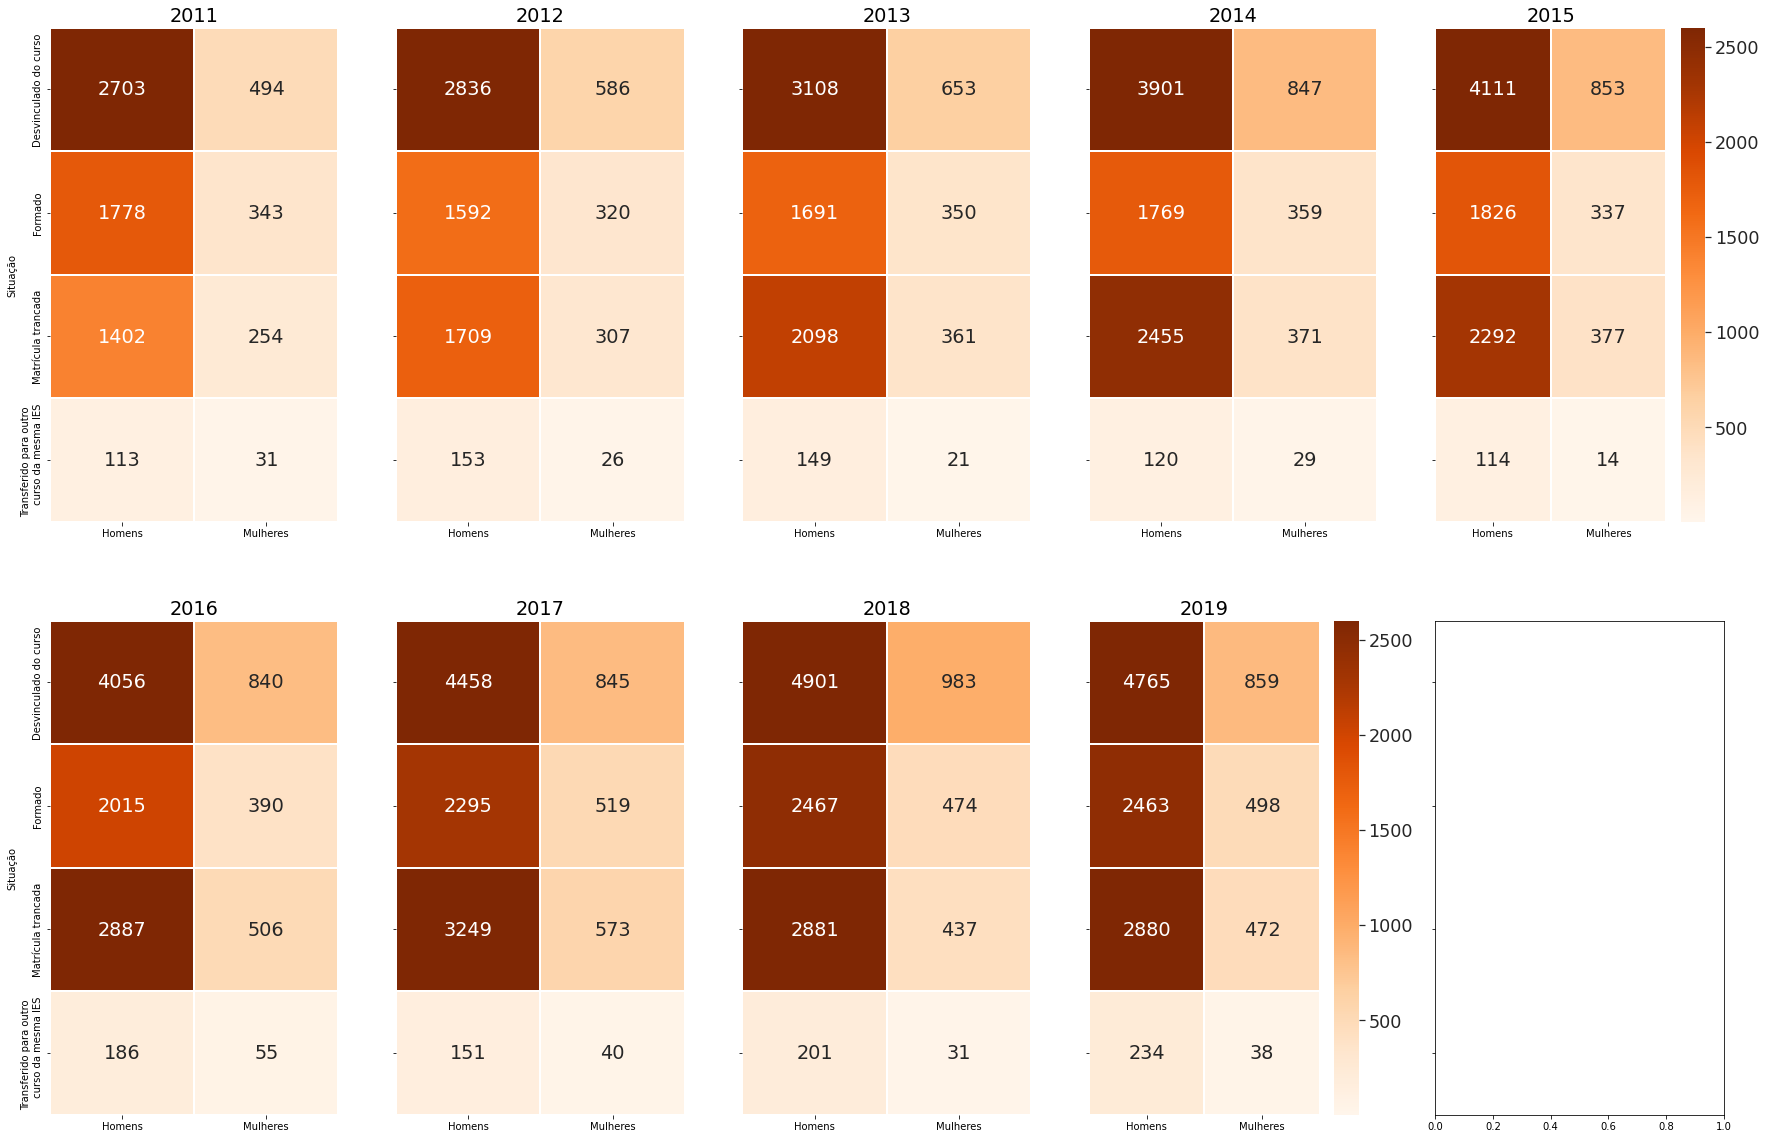

In [43]:
lines = 2
columns = 5
fig, axes = plt.subplots(lines, columns, figsize=(30, 20), sharey=True)
sn.set(font_scale = 1.6)

anos = [x for x in range(2011, 2020)]
count = 0
for i in range(lines):
    for j in range(columns):
        if count == len(anos):
            break
        ht0 = gera_heatmap_df(anos[count])
        if j == columns-1 or count == len(anos) -1:
            cbar_flag = True
        else: 
            cbar_flag = False
        
        sn.heatmap(ht0,annot=True, linewidths=2, fmt='.0f', cmap='Oranges', ax=axes[i][j],  vmax=2600, vmin=1, cbar=cbar_flag, mask = ht0 < 0)
        axes[i][j].set_title(anos[count])
        axes[i][j].set_xlabel('')
        if j != 0:
            axes[i][j].set_ylabel('')
        
        count += 1

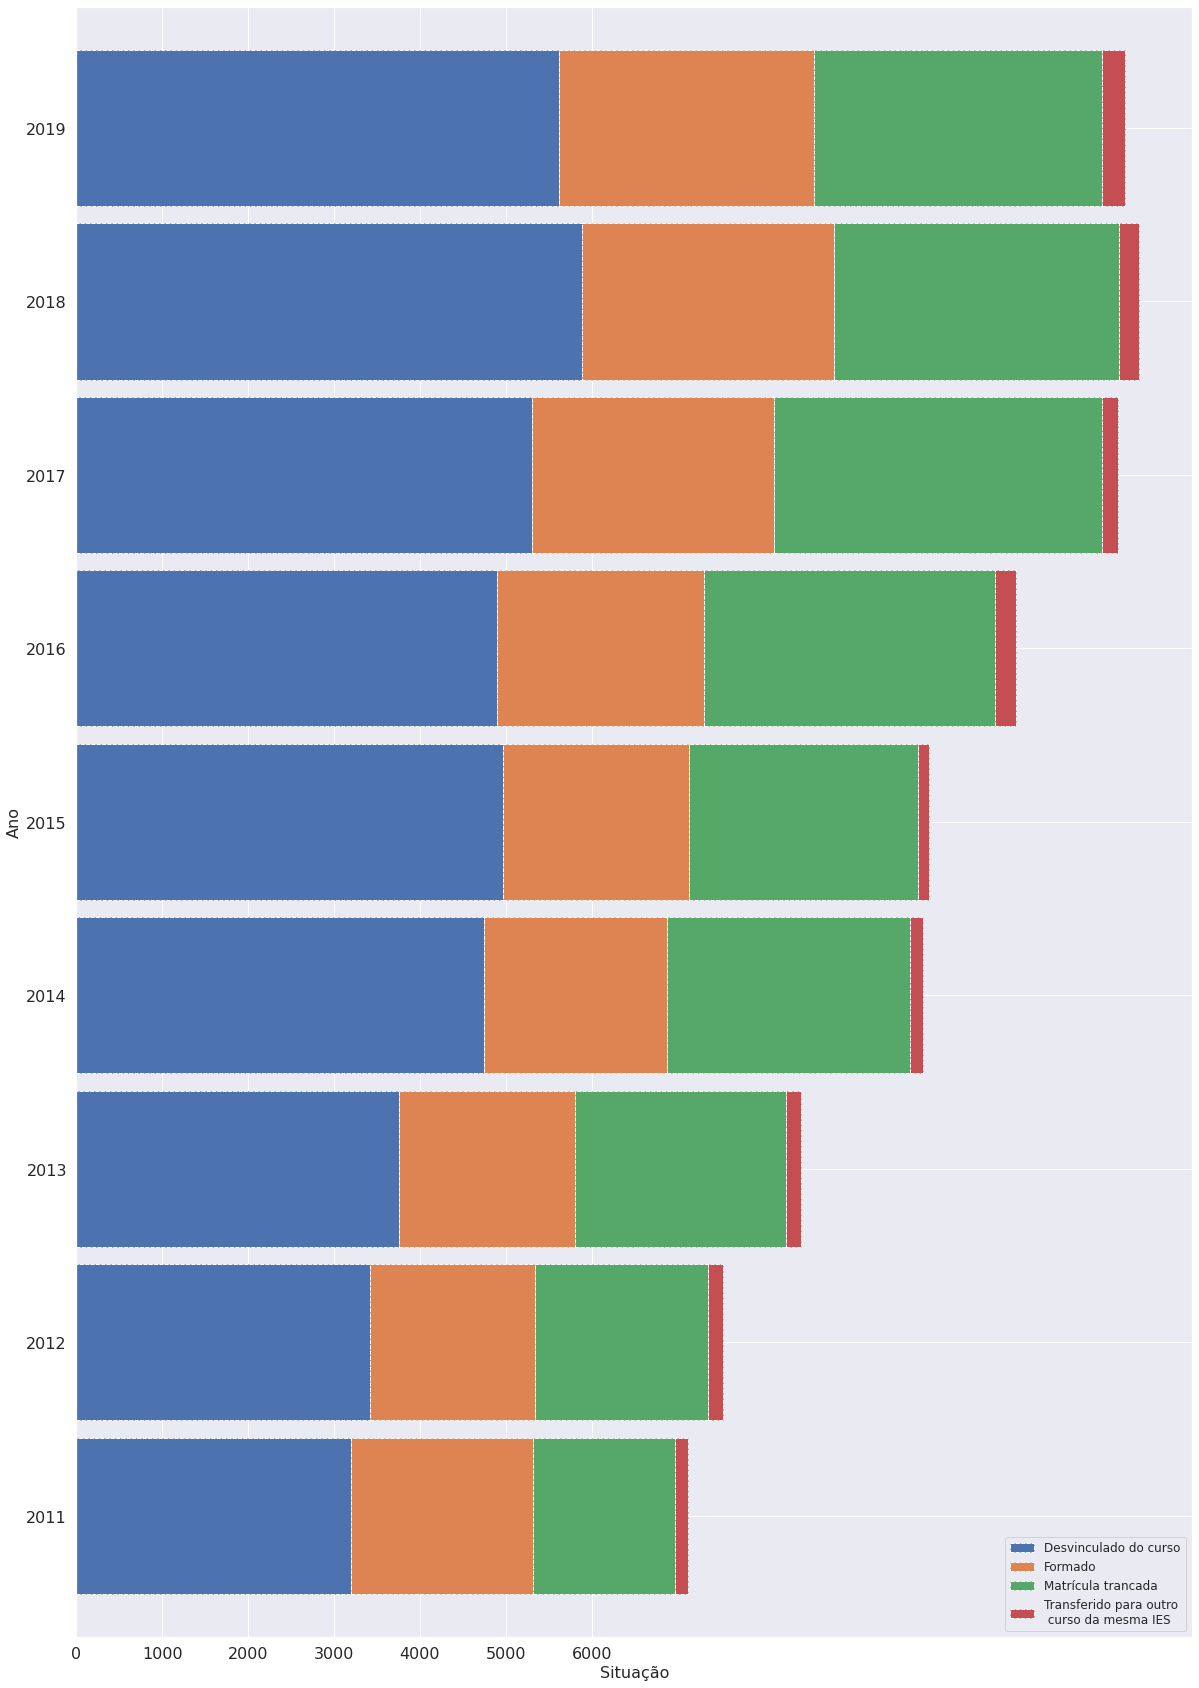

In [44]:
bar_plot_lines_stacked_horizontal(df_sem_cursando_falecido, 'NU_ANO_CENSO', 'TP_SITUACAO', 'Ano', 'Situação', tick_amout=6200, sort_params=['NU_ANO_CENSO'])
plt.savefig('stacked_horizontal_situacao.png')

* 2. Cursando
* 3. Matrícula trancada
* 4. Desvinculado do curso
* 5. Transferido para outro curso da mesma IES
* 6. Formado                                                   
* 7. Falecido  

### Gráficos de situação por sexo

In [ ]:
# df_sem_cursando.replace(replace_map).groupby(['TP_SITUACAO', 'TP_SEXO'])['NU_ANO_CENSO'].value_counts().sort_values().unstack(0) \
#         .plot.bar(rot=0, figsize=(25, 10), stacked=True,fontsize=16, width=0.9, linestyle="--") \
#         .legend(prop={'size': 20})

# (df_sem_cursando.pivot_table(index='NU_ANO_CENSO', columns='TP_SEXO', values='TP_SITUACAO',
#                 aggfunc='sum', fill_value=0))
#    .plot.bar(stacked=True))

group_teste = df_sem_cursando.groupby(['NU_ANO_CENSO', 'TP_SEXO'])['TP_SITUACAO'].value_counts().unstack(2)

# display(group_teste)
ano, sexo = zip(*group_teste.index.tolist())
values = group_teste.values.tolist()
col = group_teste.columns
# print(values[0], ano, sexo, col)
# print(group_teste)
valores_f = []
valores_m = []
for j in group_teste.columns:
    valf,valm = [],[]
    for i in range(0, len(group_teste[j].values), 2):
        valf.append(group_teste[j].values[i])
        valm.append(group_teste[j].values[i+1])
#         print(group_teste[j].values[i+1], group_teste[j].values[i])
#     print(valf)
#     print(valm)
    valores_f.append(valf)
    valores_m.append(valm)
# print([group_teste[7].values.tolist()[x] for x in range(len(values[0])])
# for i in range(len(values)):
#     for j in range(len(values[i])):
#         val = []
        
#     if i % 2 == 0:
#         valores_f.append(values[i][j])
#     else:
#         valores_m.append(values[i][j])
# print(valores_f)
# print(valores_f, valores_m)

df_teste = pd.DataFrame({'3f':valores_f[0], '4f': valores_f[1], '5f': valores_f[2], '6f':valores_f[3], '7f':valores_f[4],
                         '3m':valores_m[0], '4m': valores_m[1], '5m': valores_m[2], '6m':valores_m[3], '7m':valores_m[4]
                        }, index=[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
# df_teste.plot().bar()/

fig, ax = plt.subplots(figsize=(20, 10))
df_teste[['3m']].plot.bar(stacked=True, width=0.2, position=0, colormap="Pastel1", ax=ax,edgecolor='black',linestyle="--", )
df_teste[['3f']].plot.bar(stacked=True, width=0.2, position=0, colormap="Pastel1", ax=ax,edgecolor='black',rot=90)

df_teste[['4m']].plot.bar(stacked=True, width=0.2, position=1, colormap="Pastel2", ax=ax, edgecolor='black',linestyle="--")

df_teste[['4f']].plot.bar(stacked=True, width=0.2, position=1, colormap="Pastel2", ax=ax, edgecolor='black')
df_teste[['5m']].plot.bar(stacked=True, width=0.2, position=2, colormap="tab10", ax=ax, edgecolor='black',linestyle="--")

df_teste[['5f']].plot.bar(stacked=True, width=0.2, position=2, colormap="tab10", ax=ax, edgecolor='black')
df_teste[['6m']].plot.bar(stacked=True, width=0.2, position=3, colormap="Dark2", ax=ax, edgecolor='black',linestyle="--")

df_teste[['6f']].plot.bar(stacked=True, width=0.2, position=3, colormap="Dark2", ax=ax,edgecolor='black')
df_teste[['7m']].plot.bar(stacked=True, width=0.2, position=4, colormap="Accent", ax=ax, edgecolor='black',linestyle="--")

df_teste[['7f']].plot.bar(stacked=True, width=0.2, position=4, colormap="Accent", ax=ax, edgecolor='black')

plt.legend(['Matrícula trancada - Homens', 'Matrícula trancada - Mulheres', 
            'Desvinculado do curso - Homens', 'Desvinculado do curso - Mulheres',
            'Transferido para outro curso da mesma IES - Homens', 'Transferido para outro curso da mesma IES - Mulheres',
            'Formado - Homens', 'Formado - Mulheres', 
            'Falecido - Homens', 'falecido - Mulheres'], loc="upper left")
# plt.figure(figsize=(20, 30))
plt.show()

### Gráfico de situação geral

In [ ]:
bar_plot_lines(df_sem_cursando_falecido, 'NU_ANO_CENSO', 'TP_SITUACAO', 'Ano', 'Situação')

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2)

df_sem_cursando_falecido_h = df_sem_cursando_falecido.loc[df_sem_cursando_falecido.TP_SEXO == 2]
df_sem_cursando_falecido_m = df_sem_cursando_falecido.loc[df_sem_cursando_falecido.TP_SEXO == 1]


df_sem_cursando_falecido_h.replace(replace_map).groupby('TP_SITUACAO')['NU_ANO_CENSO'].value_counts().sort_values().unstack(0) \
    .plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--", ax=axes[0], title='Homens') \
    .legend(prop={'size': 20}) 
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Quantidade absoluta')
df_sem_cursando_falecido_m.replace(replace_map).groupby('TP_SITUACAO')['NU_ANO_CENSO'].value_counts().sort_values().unstack(0) \
    .plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--", ax=axes[1], title='Mulheres') \
    .legend(prop={'size': 20}) 
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Quantidade absoluta')

In [ ]:
df.groupby('')

### Crescimento de estudantes cursando por ano

In [69]:
ax = df_apenas_cursando.groupby(['Ano']).size() 
df_quantidade_est_ano = pd.DataFrame({'Ano':ax.index, 'Value':ax.values})
df_quantidade_est_ano.to_csv('quantidade_de_estudantes_ano.csv', index=False)
# ax = df_quantidade_est_ano.plot(x='Ano', y='Value', kind='line', lw=3, figsize=(20, 10), title='Impacto por projeto')
# ax.annotate('Big event happened', 
#             xy=(df_quantidade_est_ano.Ano[3], 0),xytext=(3, 15),
#             textcoords='offset points', 
#             arrowprops=dict(facecolor='red', shrink=0.05))